In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
from time import sleep

import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import PIL.Image as Image

from dataset import *
from utilities import *
from resnet import *
from config import *

/home/stevenzhang/miniconda3/envs/vnn/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/home/stevenzhang/miniconda3/envs/vnn/lib/python3.10/site-packages/torchvision/transforms/transforms.py:1435: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [3]:
color_to_gray_map, gray_to_color_map = None, None

In [4]:
np.random.seed(0)
train_imageset_path = '../trainval/DAVIS/ImageSets/2017/train.txt'
val_imageset_path = '../trainval/DAVIS/ImageSets/2017/val.txt'
testd_imageset_path = '../testd/DAVIS/ImageSets/2017/test-dev.txt'
trainval_image_root = '../trainval/DAVIS/JPEGImages/480p/'
trainval_mask_root = '../trainval/DAVIS/Annotations/480p/'
testd_image_root = '../testd/DAVIS/JPEGImages/480p/'
testd_mask_root = '../testd/DAVIS/Annotations/480p/'
models_root = '../models/'

train_list = []
val_list = []
test_list = []

with open(train_imageset_path, 'r') as f:
    for line in f:
        train_list.append(line.strip())
with open(val_imageset_path, 'r') as f:
    for line in f:
        val_list.append(line.strip())
with open(testd_imageset_path, 'r') as f:
    for line in f:
        test_list.append(line.strip())


In [5]:
def eval(image_root, mask_root, target_list):
    
    for t in range(len(target_list)):
        print(target_list[t])
        image_path = os.path.join(image_root, target_list[t] + '/00000.jpg')
        mask_path = os.path.join(mask_root, target_list[t] + '/00000.png')
        model_save_path = os.path.join(models_root, target_list[t] + '.pt')
    
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path)
    
        image = cv2.resize(image, Resize, interpolation=cv2.INTER_NEAREST)
        mask = cv2.resize(mask, Resize, interpolation=cv2.INTER_NEAREST)
        mask, color_to_gray_map, gray_to_color_map = convert_to_gray_mask(mask)
        print('type_cnt:', len(color_to_gray_map))
        
        if len(color_to_gray_map) > 2:
            continue
    
        val_dataset = CustomDataset(image_path, mask_path, image_transform=val_image_transforms, mask_transform=val_mask_transforms, num_samples=1)
        val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)
    
        model = MyResNet(len(color_to_gray_map)).to(device)
        model.load_state_dict(torch.load(model_save_path))
    
        model.eval()
        for image, mask in val_dataloader:
            
            mask = (mask * 255).long()
            input = torch.cat((image, mask), dim=1).to(device)
            output_mask = torch.argmax(model(input), dim=1)
            output = model(input)
            loss = F.cross_entropy(output, input[:, 3, :, :].long())
            print(loss.item(), torch.sum(output_mask == torch.tensor(input[:, 3, :, :]).to(device)).item() / (224 * 224))
            
            mask_np = mask.squeeze(0).cpu().numpy().transpose(1, 2, 0)
            output_mask_np = output_mask.cpu().numpy().transpose(1, 2, 0)
            image_np = image.squeeze(0).numpy().transpose(1, 2, 0)
            print_images([image_np, mask_np, output_mask_np])


bear
type_cnt: 2
0.326659232378006 0.9927256058673469


/home/stevenzhang/miniconda3/envs/vnn/lib/python3.10/site-packages/segmentation_models_pytorch/base/modules.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)
/tmp/ipykernel_831141/2562897449.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(loss.item(), torch.sum(output_mask == torch.tensor(input[:, 3, :, :]).to(device)).item() / (224 * 224))


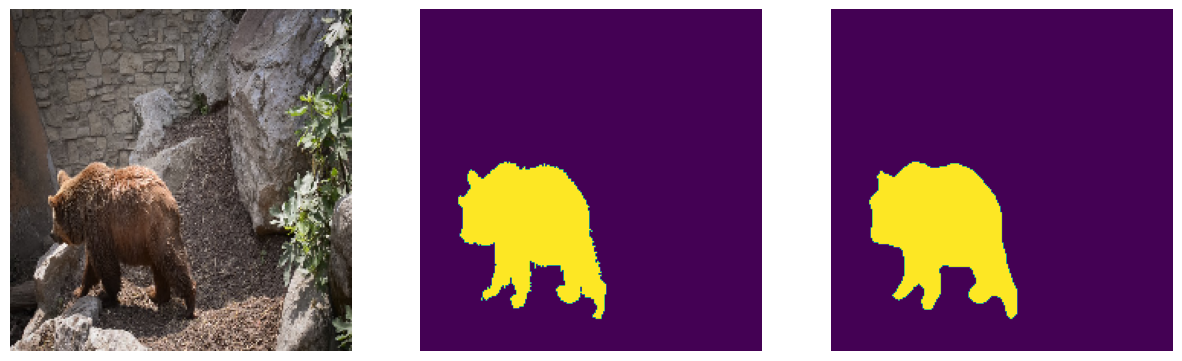

bmx-bumps
type_cnt: 3
boat
type_cnt: 2
0.3326833248138428 0.9873844068877551


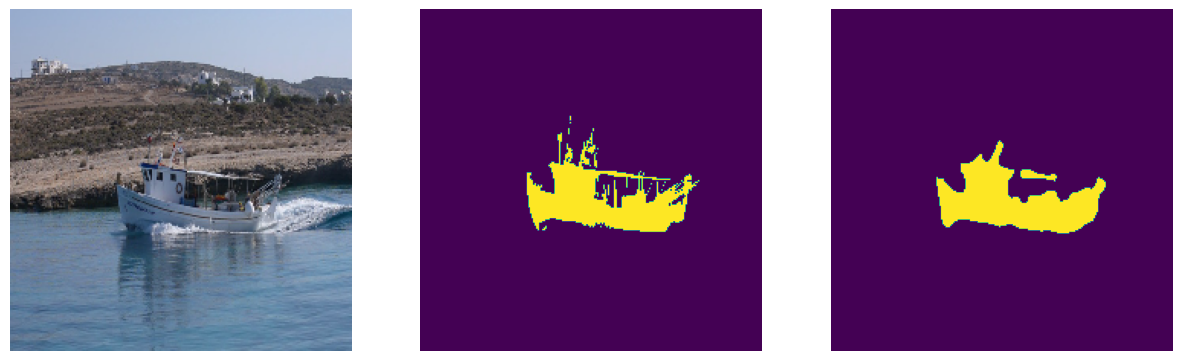

boxing-fisheye
type_cnt: 4
breakdance-flare
type_cnt: 2
0.32517361640930176 0.9930444834183674


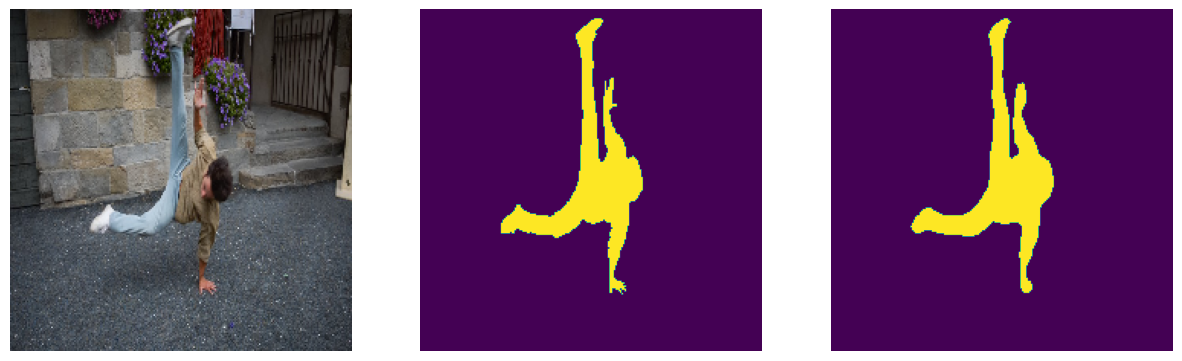

bus
type_cnt: 2
0.32307711243629456 0.9947385204081632


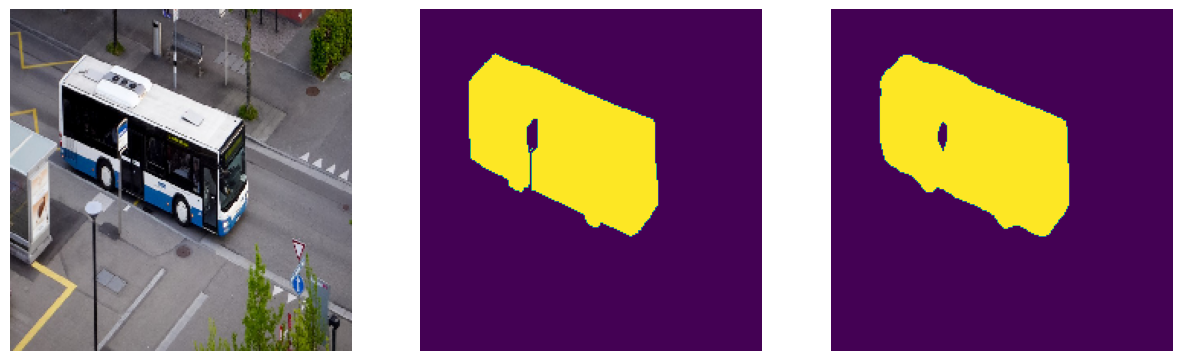

car-turn
type_cnt: 2
0.32285451889038086 0.9970105229591837


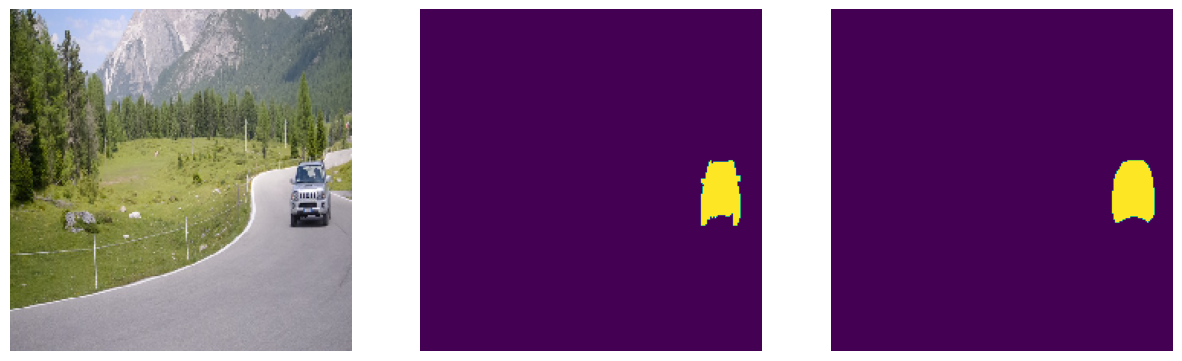

cat-girl
type_cnt: 3
classic-car
type_cnt: 4
color-run
type_cnt: 4
crossing
type_cnt: 4
dance-jump
type_cnt: 2
0.32501643896102905 0.993781887755102


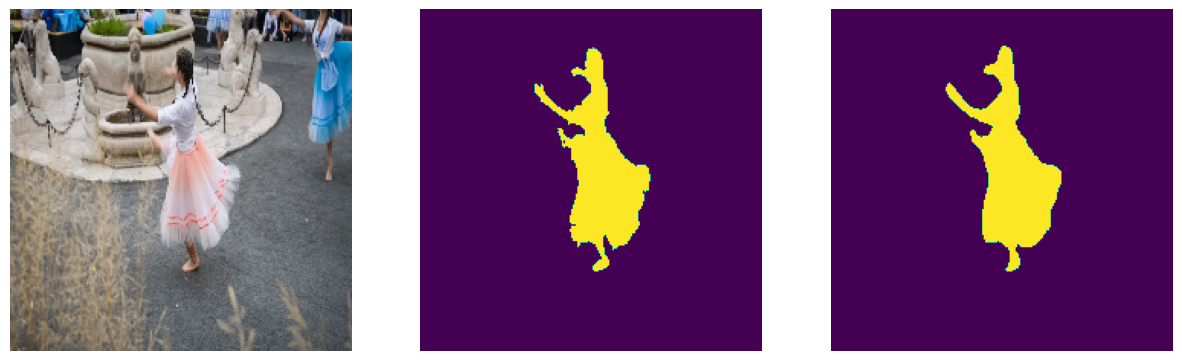

dancing
type_cnt: 4
disc-jockey
type_cnt: 4
dog-agility
type_cnt: 2
0.3271336853504181 0.9910514987244898


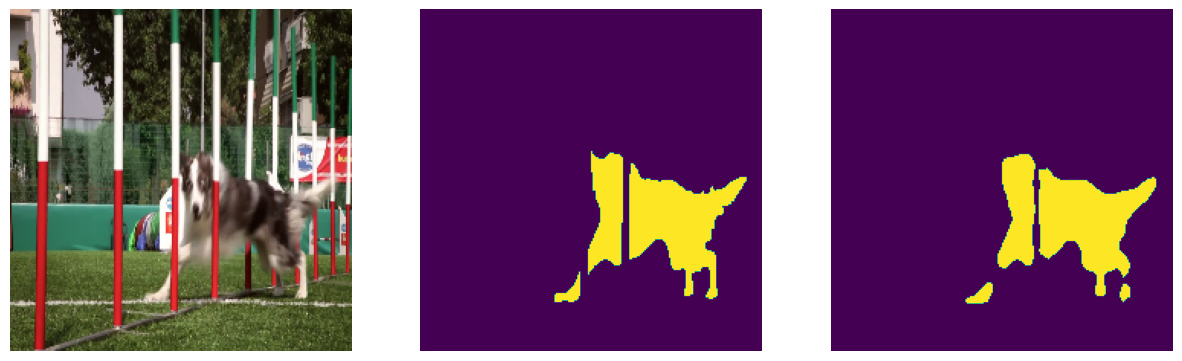

dog-gooses
type_cnt: 6
dogs-scale
type_cnt: 5
drift-turn
type_cnt: 2
0.3238315284252167 0.9979272959183674


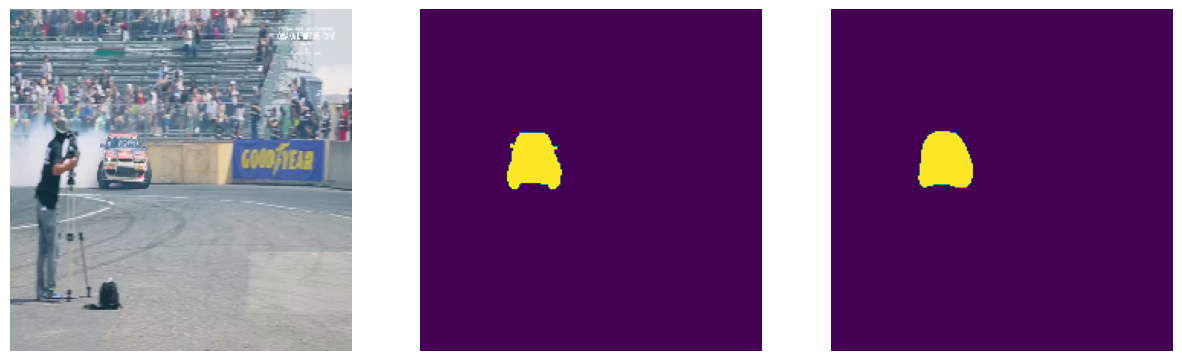

drone
type_cnt: 6
elephant
type_cnt: 2
0.3250960409641266 0.9927654655612245


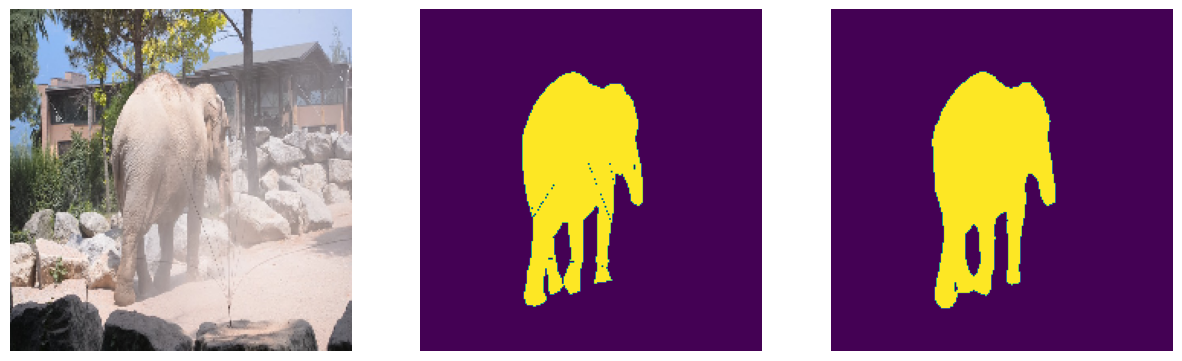

flamingo
type_cnt: 2
0.32840830087661743 0.9917689732142857


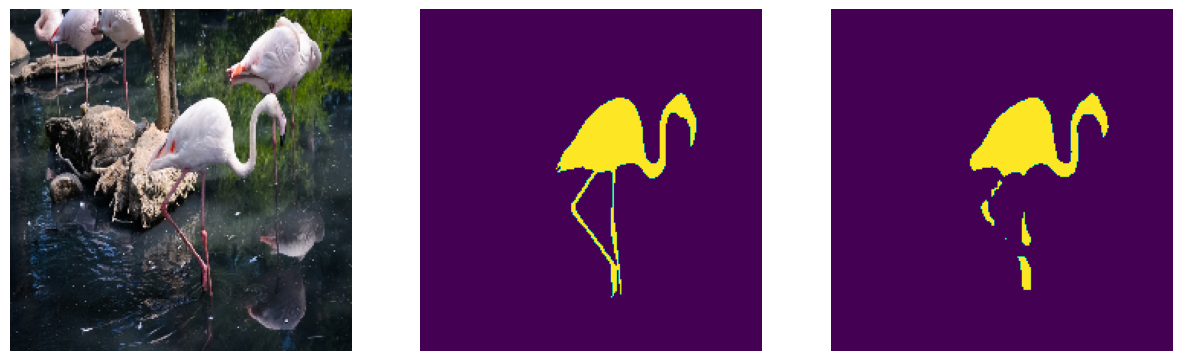

hike
type_cnt: 2
0.32727113366127014 0.9955556441326531


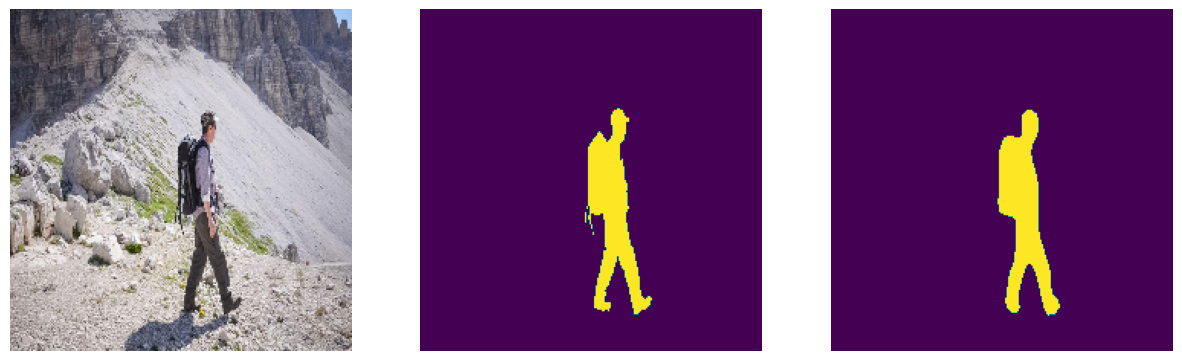

hockey
type_cnt: 4
horsejump-low
type_cnt: 3
kid-football
type_cnt: 3
kite-walk
type_cnt: 4
koala
type_cnt: 2
0.3258652687072754 0.9900749362244898


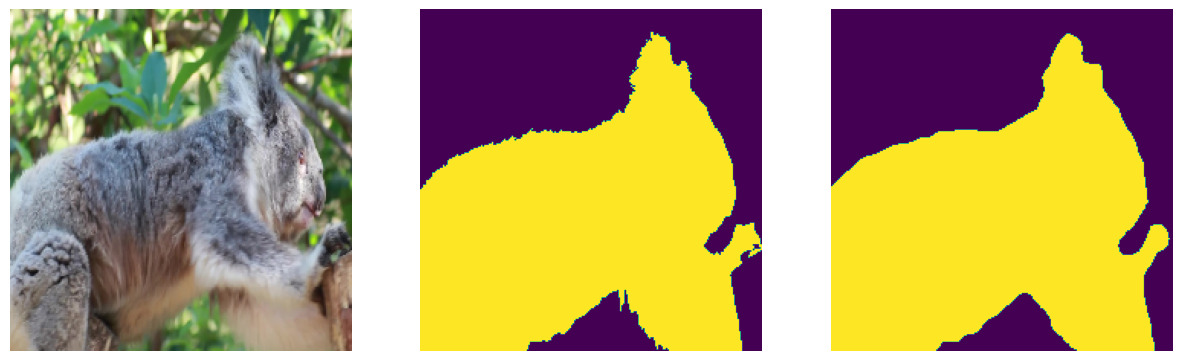

lady-running
type_cnt: 3
lindy-hop
type_cnt: 9
longboard
type_cnt: 6
lucia
type_cnt: 2
0.3243389427661896 0.9945790816326531


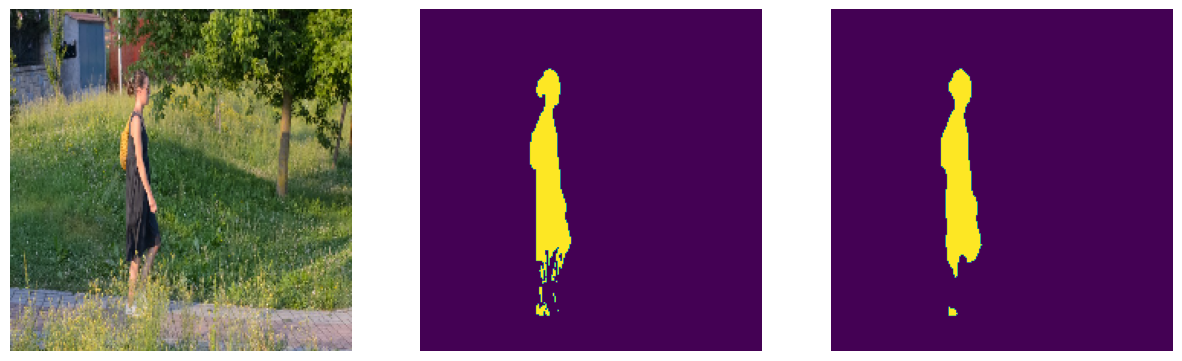

mallard-fly
type_cnt: 2
0.3221816420555115 0.9970703125


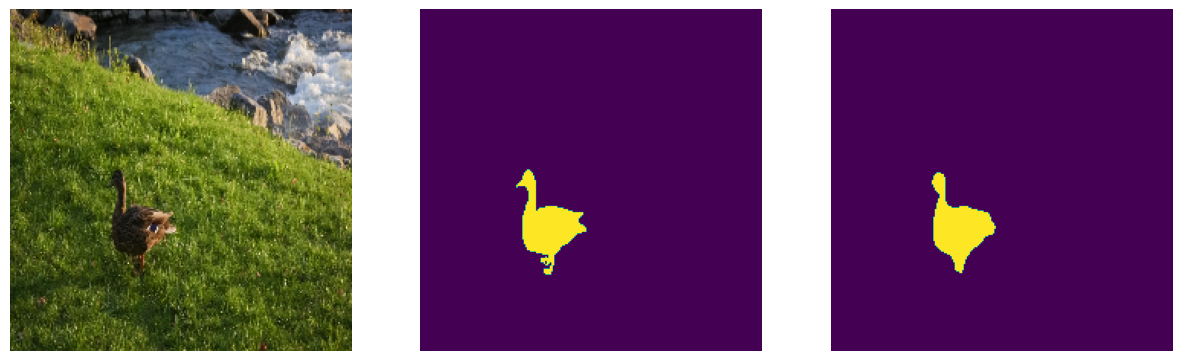

mallard-water
type_cnt: 2
0.3218677043914795 0.9960738201530612


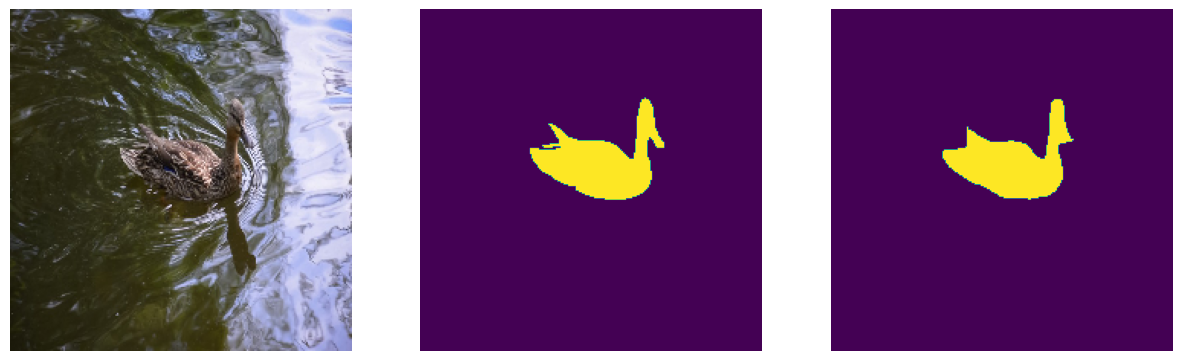

miami-surf
type_cnt: 7
motocross-bumps


KeyboardInterrupt: 

In [6]:
eval(trainval_image_root, trainval_mask_root, train_list)
eval(trainval_image_root, trainval_mask_root, val_list)
eval(testd_image_root, testd_mask_root, test_list)